In [74]:
import matplotlib.pyplot as plt
import numpy as np
from BoxTheJets.aggregation import json_import_list, json_export_list
import os
plt.style.use('default')
%matplotlib inline

In [32]:
from BoxTheJets.aggregation import Aggregator, get_subject_image
from BoxTheJets.aggregation import SOL

aggregator = Aggregator('BoxTheJets/reductions/point_reducer_hdbscan_box_the_jets.csv', 
                        'BoxTheJets/reductions/shape_reducer_dbscan_box_the_jets.csv')
#                        'BoxTheJets/reductions/shape_reducer_hdbscan_box_the_jets.csv')
#                        'BoxTheJets/reductions/shape_reducer_optics_box_the_jets_old.csv')
aggregator.load_extractor_data('BoxTheJets/extracts/point_extractor_by_frame_box_the_jets.csv',
                               'BoxTheJets/extracts/shape_extractor_rotateRectangle_box_the_jets.csv')
sol = SOL('SOL_Tc_stats.csv', aggregator)

In [97]:
#Loading in the class functions
Jet_clusters=json_import_list('BoxTheJets/exports/Jet_clusters_3.0_2.0_test_final.json')
Cluster_SOL= np.array([Jet_clusters[i].SOL for i in range(len(Jet_clusters))],dtype=str)
Cluster_date = np.array([Jet_clusters[i].obs_time for i in range(len(Jet_clusters))],dtype=str)

Jet_clusters2=json_import_list('BoxTheJets/exports/Jet_clusters_3.0_2.0_old_final.json')
Cluster_SOL2= np.array([Jet_clusters2[i].SOL for i in range(len(Jet_clusters2))],dtype=str)
Cluster_date2 = np.array([Jet_clusters2[i].obs_time for i in range(len(Jet_clusters2))],dtype=str)

Jet_clusters3=json_import_list('BoxTheJets/exports/Jet_clusters_3.0_2.0_dbscan_final.json')
Cluster_SOL3= np.array([Jet_clusters3[i].SOL for i in range(len(Jet_clusters3))],dtype=str)
Cluster_date3 = np.array([Jet_clusters3[i].obs_time for i in range(len(Jet_clusters3))],dtype=str)

Jet_clusters4=json_import_list('BoxTheJets/exports/Jet_clusters_3.0_2.0_dbscan_0.8_final.json')
Cluster_SOL4= np.array([Jet_clusters4[i].SOL for i in range(len(Jet_clusters4))],dtype=str)
Cluster_date4 = np.array([Jet_clusters4[i].obs_time for i in range(len(Jet_clusters4))],dtype=str)



Jet_clusters5=json_import_list('BoxTheJets/exports/Jet_clusters_3.0_2.0_dbscan_0.6_cluster3.json')
Cluster_SOL5= np.array([Jet_clusters5[i].SOL for i in range(len(Jet_clusters5))],dtype=str)
Cluster_date5 = np.array([Jet_clusters5[i].obs_time for i in range(len(Jet_clusters5))],dtype=str)

Jet_clusters6=json_import_list('BoxTheJets/exports/Jet_clusters_3.0_2.0_dbscan_0.8_cluster3.json')
Cluster_SOL6= np.array([Jet_clusters6[i].SOL for i in range(len(Jet_clusters6))],dtype=str)
Cluster_date6 = np.array([Jet_clusters6[i].obs_time for i in range(len(Jet_clusters6))],dtype=str)

#Load in the SOL statistics
SOL_small,SOL_subjects,filenames0,times,Num,start,end,notes=np.loadtxt('SOL_{}_stats.csv'.format('Tc'),delimiter=',',unpack=True,dtype=str)
Num=Num.astype(float)

The 334 JetCluster objects are imported from BoxTheJets/exports/Jet_clusters_3.0_2.0_test_final.json.
The 426 JetCluster objects are imported from BoxTheJets/exports/Jet_clusters_3.0_2.0_old_final.json.
The 307 JetCluster objects are imported from BoxTheJets/exports/Jet_clusters_3.0_2.0_dbscan_final.json.
The 404 JetCluster objects are imported from BoxTheJets/exports/Jet_clusters_3.0_2.0_dbscan_0.8_final.json.
The 373 JetCluster objects are imported from BoxTheJets/exports/Jet_clusters_3.0_2.0_dbscan_0.6_cluster3.json.
The 404 JetCluster objects are imported from BoxTheJets/exports/Jet_clusters_3.0_2.0_dbscan_0.8_cluster3.json.


In [104]:
dir(Jet_clusters[0].jets)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [39]:
def find_index_date(day,dates):
    '''Find the index of Jet clusters that start on the input date 
    Input: yyyy-mm-dd
    Output: np.array with indices'''
    day_index=np.where(np.char.find(dates, day)>=0)[0]
    return day_index

In [35]:
def show_stats(C):
    print('ID',C.ID)
    print('Observed at',C.obs_time)
    print('Basepoint X',int(C.Bx),"$\pm$",(C.std_Bx),'$\'\'$')
    print('Basepoint Y',int(C.By),'$\pm$',(C.std_By),'$\'\'$')
    print('Latitude',int(C.Lat),'$^{\circ}$')
    print('Longitude',int(C.Lon),'$^{\circ}$')
    print('Maximum Height',int(C.Max_Height),'$\pm$',(C.std_maxH),'$\'\'$')
    print('Width',int(C.Width),'$\pm$',int(C.std_W),'$\'\'$')
    print('Duration',np.round(C.Duration,1),' minutes')
    print('Sigma',np.round(C.sigma,2))
    try:
        print('Velocity',int(C.Velocity*725), 'km$s^{-1}$')
    except:
        print('Velocity',C.Velocity)

In [100]:
result_file = open("Different_clusters.txt", 'w')
#print('Date hdbscan, optics, dbscannoeps, dbscan0.8, dbscan0.6')
c=0
print('Date dbscan0.8, dbscan0.6', 'dbscan0.8_3')

for day in np.unique(Cluster_SOL4):
    D=day[3:13]
    day_index=find_index_date(D,Cluster_date)
    day_index2=find_index_date(D,Cluster_date2)
    day_index3=find_index_date(D,Cluster_date3)
    day_index4=find_index_date(D,Cluster_date4)
    day_index5=find_index_date(D,Cluster_date5)
    day_index6=find_index_date(D,Cluster_date6)

    #print(D,len(day_index),len(day_index2),len(day_index3),len(day_index4),len(day_index5))

    if len(day_index)!=len(day_index2) or len(day_index)!=len(day_index3) or len(day_index2)!=len(day_index3) or len(day_index2)!=len(day_index4) or len(day_index4)!=len(day_index3) or len(day_index)!=len(day_index4) or len(day_index5)!=len(day_index4) or len(day_index5)!=len(day_index3) or len(day_index5)!=len(day_index3) or len(day_index5)!=len(day_index2) or len(day_index5)!=len(day_index) or len(day_index6)!=len(day_index5) or len(day_index6)!=len(day_index4):
        #print(D,len(day_index),len(day_index2),len(day_index3), len(day_index4), len(day_index5))
        result_file.write(f'{D} {len(day_index)} {len(day_index2)} {len(day_index3)} {len(day_index4)} {len(day_index5)} {str(sol.get_subjects(day))[1:-2]} \n')
        

    if len(day_index4)!=len(day_index5) or len(day_index5)!=len(day_index6) or len(day_index6)!=len(day_index4):
        print(D,len(day_index4),len(day_index5),len(day_index6))
        c+=len(day_index4)-len(day_index5)
    
result_file.close()

Date dbscan0.8, dbscan0.6 dbscan0.8_3
2011-03-29 1 0 1
2011-05-26 1 0 1
2011-05-28 29 25 29
2011-09-14 3 2 3
2011-12-31 1 0 1
2012-03-17 3 1 3
2012-04-02 18 17 18
2012-09-01 6 5 6
2012-09-01 6 5 6
2012-09-23 2 1 2
2012-10-19 7 8 7
2012-10-19 7 8 7
2012-11-14 1 0 1
2012-12-16 46 42 46
2012-12-30 3 2 3
2013-04-24 2 1 2
2013-05-05 11 12 11
2013-05-05 11 12 11
2013-06-02 3 2 3
2013-08-12 3 4 3
2013-09-12 2 1 2
2013-10-12 7 5 7
2013-11-24 4 2 4
2013-12-22 8 7 8
2013-12-22 8 7 8
2013-12-22 8 7 8
2013-12-25 2 1 2
2013-12-26 6 5 6


In [101]:
D='2012-10-19'
day_index4=find_index_date(D,Cluster_date4)
day_index5=find_index_date(D,Cluster_date5)
S4=np.unique(Cluster_SOL4[day_index4])
print(S4)
#print(sol.get_subjects(S4))
S5=np.unique(Cluster_SOL5[day_index5])
print(S5)
#print(sol.get_subjects(S5))

['SOL2012-10-19T04:00:03L132C107' 'SOL2012-10-19T22:10:11L243C173']
['SOL2012-10-19T04:00:03L132C107' 'SOL2012-10-19T22:10:11L243C173']


In [77]:
day

'SOL2013-12-26T02:24:03L299C108'

In [11]:
diff_dates,nnew,nold,ndb,ndb8, ndb6=np.loadtxt('Different_clusters.txt',dtype=str,usecols=(0,1,2,3,4,5) , unpack=True)

IndexError: list index out of range

db0.8 jets
ID 136
Observed at 2012-03-17T23:41:08
Basepoint X 222 $\pm$ 8.468726321000101 $''$
Basepoint Y -954 $\pm$ 2.729504442201931 $''$
Latitude -75 $^{\circ}$
Longitude 117 $^{\circ}$
Maximum Height 92 $\pm$ [ 30.16317631 -22.7334985 ] $''$
Width 24 $\pm$ 9 $''$
Duration 21.2  minutes
Sigma 0.49
Velocity 214 km$s^{-1}$


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:10<00:00, 17.70s/it]
MovieWriter imagemagick unavailable; using Pillow instead.


db0.8 jets
ID 137
Observed at 2012-03-17T23:51:32
Basepoint X 213 $\pm$ 0.0 $''$
Basepoint Y -956 $\pm$ 0.0 $''$
Latitude -75 $^{\circ}$
Longitude 118 $^{\circ}$
Maximum Height 72 $\pm$ [ 24.27506626 -18.21274104] $''$
Width 31 $\pm$ 0 $''$
Duration 5.6  minutes
Sigma 0.44
Velocity nan


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:22<00:00, 22.87s/it]
MovieWriter imagemagick unavailable; using Pillow instead.


db0.8 jets
ID 138
Observed at 2012-03-17T23:56:44
Basepoint X 246 $\pm$ 20.355500000000006 $''$
Basepoint Y -947 $\pm$ 7.393000000000029 $''$
Latitude -73 $^{\circ}$
Longitude 114 $^{\circ}$
Maximum Height 78 $\pm$ [ 50.59199722 -30.81401174] $''$
Width 39 $\pm$ 20 $''$
Duration 10.8  minutes
Sigma 0.59
Velocity 183 km$s^{-1}$


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:32<00:00, 16.35s/it]
MovieWriter imagemagick unavailable; using Pillow instead.


db0.6 jets
ID 127
Observed at 2012-03-17T23:41:08
Basepoint X 224 $\pm$ 9.910718776489759 $''$
Basepoint Y -953 $\pm$ 2.780452401238984 $''$
Latitude -75 $^{\circ}$
Longitude 117 $^{\circ}$
Maximum Height 92 $\pm$ [ 30.16317631 -22.7334985 ] $''$
Width 28 $\pm$ 12 $''$
Duration 57.8  minutes
Sigma 0.43
Velocity 214 km$s^{-1}$


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:19<00:00, 15.54s/it]
MovieWriter imagemagick unavailable; using Pillow instead.


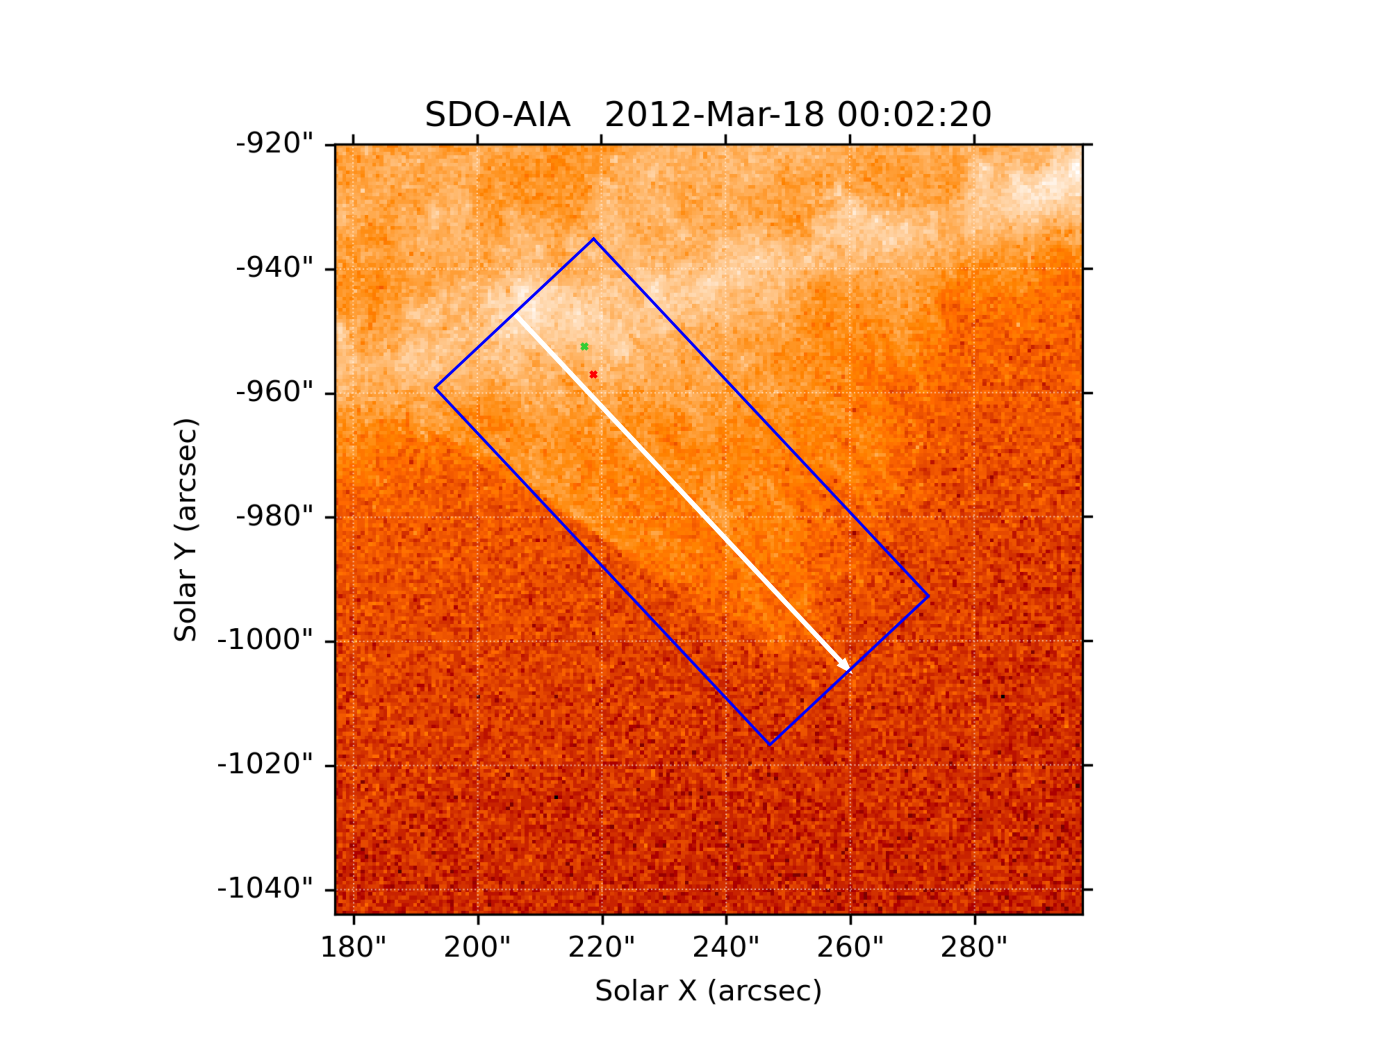

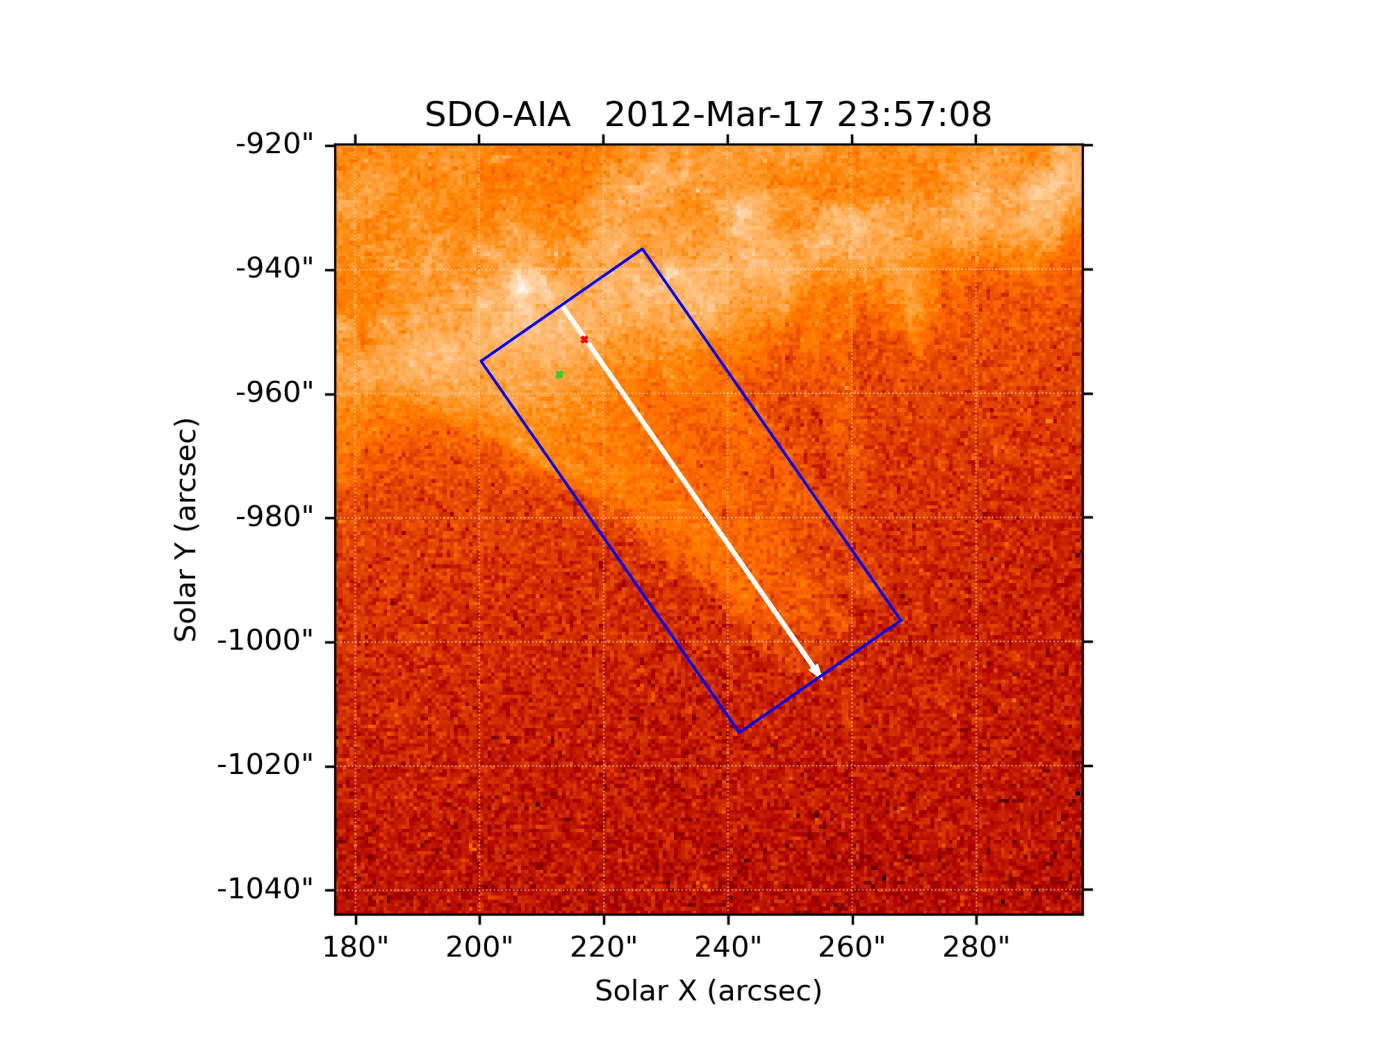

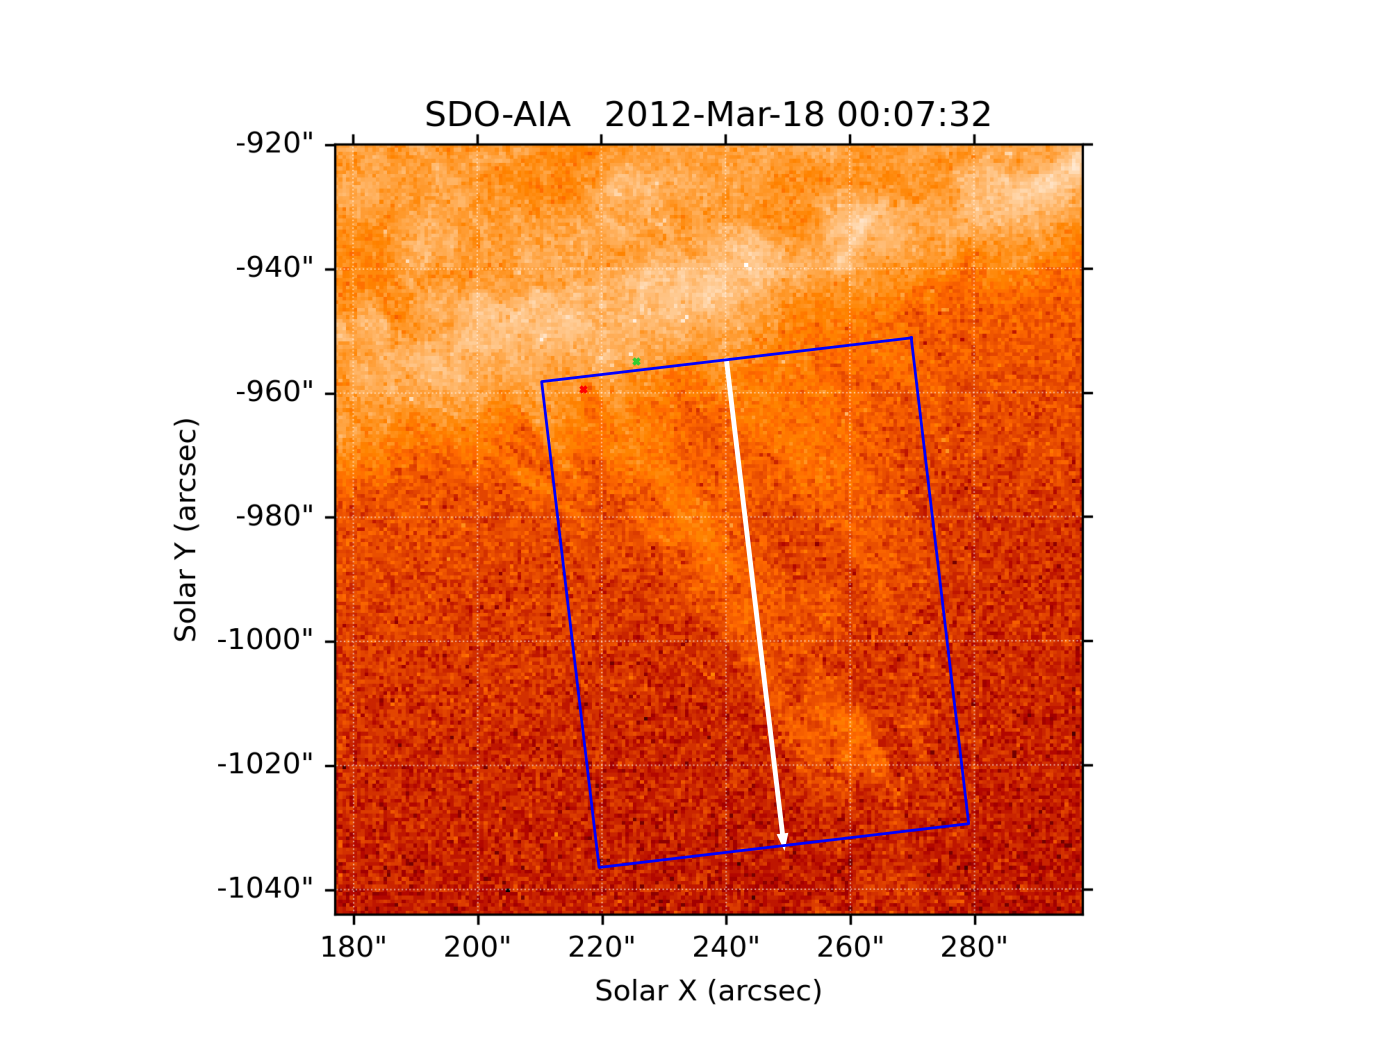

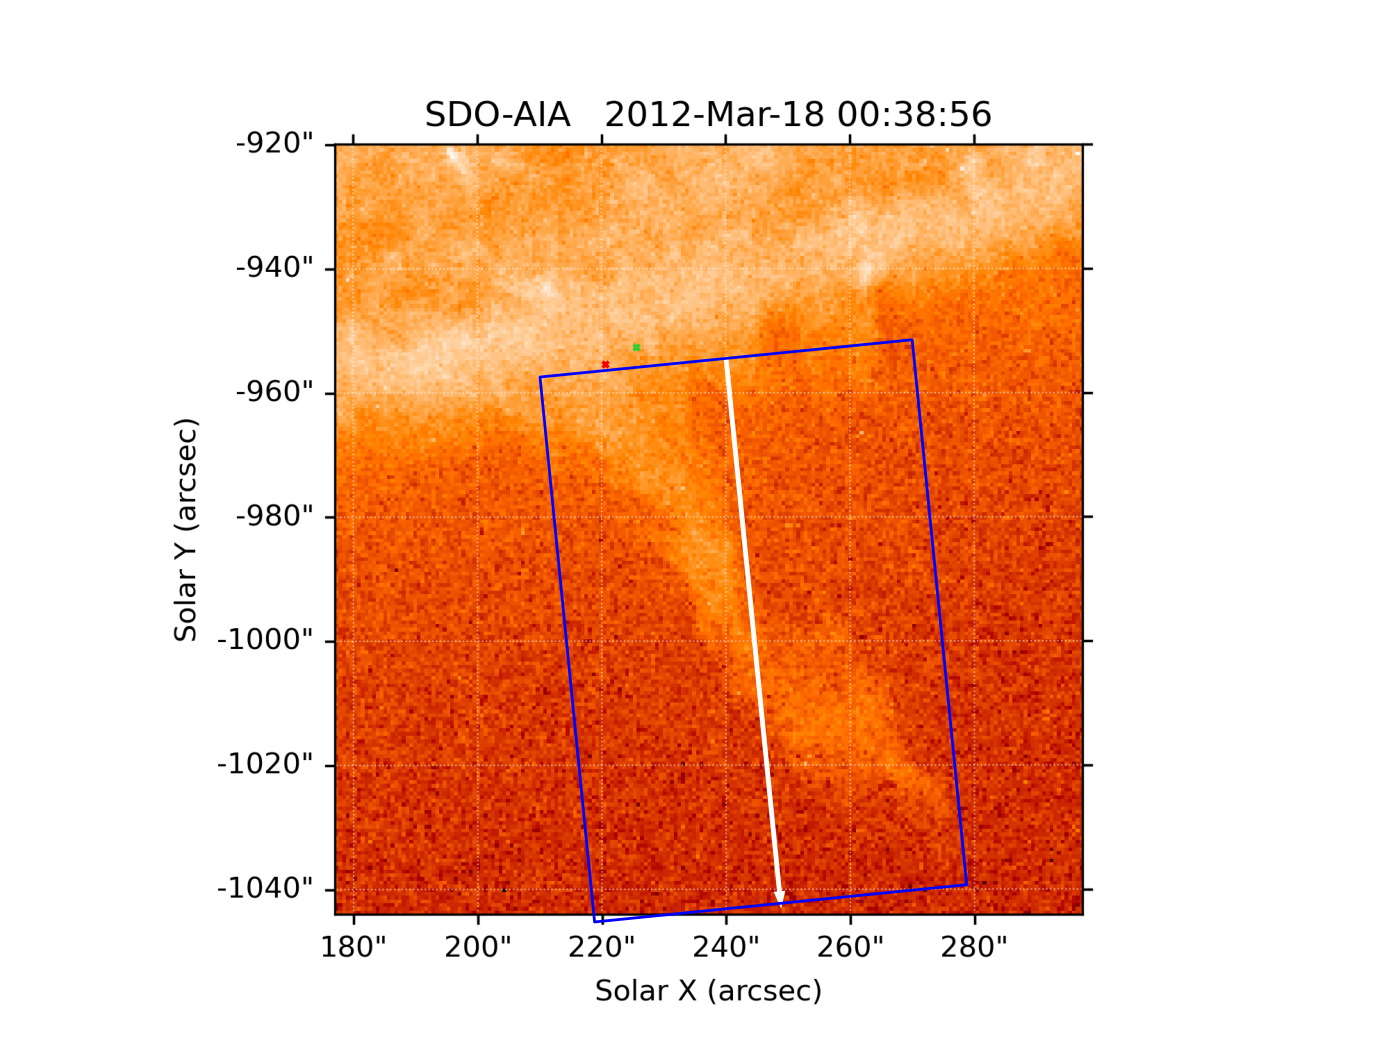

In [102]:
for date in ['2012-03-17']:#['2011-03-29', '2011-05-26', '2011-09-14', '2011-12-31', '2012-12-30', '2013-12-25', '2013-11-24']:#['2011-01-26','2012-01-22','2012-12-27','2011-05-29','2012-09-12']:
    #day_index=find_index_date(date,Cluster_date5)
    #SOL_index=day_index[0]
    #index=np.where(Cluster_SOL==Cluster_SOL[SOL_index])[0]
    #index=find_index_date(date,Cluster_date)
    '''for i in index:
        if os.path.exists(f'SOL/Gif_difference/new_{date}_{i}.gif')!= True:
            print('new jets')
            show_stats(Jet_clusters[i])
            Jet_clusters[i].create_gif(f'SOL/Gif_difference/new_{date}_{i}.gif')
    #index2=np.where(Cluster_SOL2==Cluster_SOL[SOL_index])[0]
    index2=find_index_date(date,Cluster_date2)
    for i in index2:
        if os.path.exists(f'SOL/Gif_difference/old_{date}_{i}.gif')!= True:
            print('old jets')
            show_stats(Jet_clusters2[i])
            Jet_clusters2[i].create_gif(f'SOL/Gif_difference/old_{date}_{i}.gif')
    #index3=np.where(Cluster_SOL3==Cluster_SOL[SOL_index])[0]
    index3=find_index_date(date,Cluster_date3)
    for i in index3:
        if os.path.exists(f'SOL/Gif_difference/dbs_{date}_{i}.gif')!= True:
            print('db jets')
            show_stats(Jet_clusters3[i])
            Jet_clusters3[i].create_gif(f'SOL/Gif_difference/dbs_{date}_{i}.gif')
    #index4=np.where(Cluster_SOL4==Cluster_SOL[SOL_index])[0]
    '''

    index4=find_index_date(date,Cluster_date4)
    for i in index4:
        if os.path.exists(f'SOL/Gif_difference/DBscandiff/dbs0.8_{date}_{i}.gif')!= True:
            print('db0.8 jets')
            show_stats(Jet_clusters4[i])
            Jet_clusters4[i].create_gif(f'SOL/Gif_difference/DBscandiff/dbs0.8_{date}_{i}.gif')
    index5=find_index_date(date,Cluster_date5)
    for i in index5:
        if os.path.exists(f'SOL/Gif_difference/DBscandiff/dbs0.6_{date}_{i}.gif')!= True:
            print('db0.6 jets')
            show_stats(Jet_clusters5[i])
            Jet_clusters5[i].create_gif(f'SOL/Gif_difference/DBscandiff/dbs0.6_{date}_{i}.gif')

In [69]:
date

'2013-11-24'

In [61]:
date

'2011-03-29'

In [30]:
f'SOL/Gif_difference/new_{date}_{i}.gif'

'SOL/Gif_difference/new_2011-01-26_26.gif'

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18